# Diabetes by Deep learning

In [1]:
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

# Loading Data

In [2]:
import pandas as pd
data = pd.read_csv("diabetes.csv")

In [3]:
data.head()
#data.info()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Predictors --- Label

In [4]:
feature_cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
X = data[feature_cols]
Y = data['Outcome']

# normalization

so all values eill be between 0 and 1 , this helps the models 

In [5]:
X_norm = X.apply(lambda x:(x-x.min())/(x.max()-x.min()))    #normalization

In [6]:
X_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


# splitting data

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size=0.25, random_state=42)

# one hot encoding

In [8]:
onehot = pd.get_dummies(Y_train)
print(onehot)
target_labels = onehot.columns
Y_train = np.array(onehot)
print(Y_train)


onehot = pd.get_dummies(Y_test)
target_labels = onehot.columns
Y_test = np.array(onehot)

     0  1
357  0  1
73   1  0
352  1  0
497  1  0
145  1  0
..  .. ..
71   1  0
106  1  0
270  0  1
435  0  1
102  1  0

[576 rows x 2 columns]
[[0 1]
 [1 0]
 [1 0]
 ...
 [0 1]
 [0 1]
 [1 0]]


In [9]:
Y_test

array([[1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [1, 0],
       [0, 1],
       [0, 1],
       [1, 0],
       [1, 0],
       [0, 1],
       [1, 0],
       [1, 0],
       [1,

In [10]:
X_train.shape[1]

8

In [11]:
print(X_train)

     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
357     0.764706  0.648241       0.000000       0.303030  0.000000  0.594635   
73      0.235294  0.648241       0.704918       0.202020  0.319149  0.523100   
352     0.176471  0.306533       0.672131       0.282828  0.000000  0.512668   
497     0.117647  0.407035       0.590164       0.151515  0.089835  0.448584   
145     0.000000  0.512563       0.614754       0.232323  0.000000  0.000000   
..           ...       ...            ...            ...       ...       ...   
71      0.294118  0.698492       0.524590       0.353535  0.165485  0.426230   
106     0.058824  0.482412       1.000000       0.000000  0.000000  0.333830   
270     0.588235  0.507538       0.704918       0.373737  0.000000  0.679583   
435     0.000000  0.708543       0.000000       0.000000  0.000000  0.631893   
102     0.000000  0.628141       0.786885       0.000000  0.000000  0.335320   

     DiabetesPedigreeFunction       Age

# Create model

In [12]:
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 3)
n_cols = X_train.shape[1]
model = Sequential()    # two ways to build your model, here we use the sequential model
model.add(Dense(100,activation = 'relu',input_shape = (n_cols,)))
model.add(Dense(150,activation = 'relu'))
model.add(Dense(150,activation = 'relu'))
model.add(Dense(150,activation = 'relu'))
model.add(Dense(150,activation = 'relu'))
model.add(Dense(200,activation = 'relu'))
model.add(Dense(50,activation = 'relu'))
model.add(Dense(40,activation = 'relu'))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train,Y_train,validation_split = 0.3,epochs = 100,callbacks = [early_stopping_monitor])

Epoch 1/100
13/13 [==============================] - 1s 20ms/step - loss: 0.6742 - accuracy: 0.6303 - val_loss: 0.6528 - val_accuracy: 0.6532
Epoch 2/100
13/13 [==============================] - 0s 6ms/step - loss: 0.6582 - accuracy: 0.6551 - val_loss: 0.6353 - val_accuracy: 0.6532
Epoch 3/100
13/13 [==============================] - 0s 5ms/step - loss: 0.6297 - accuracy: 0.6551 - val_loss: 0.6181 - val_accuracy: 0.6532
Epoch 4/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5883 - accuracy: 0.6551 - val_loss: 0.5647 - val_accuracy: 0.7110
Epoch 5/100
13/13 [==============================] - 0s 6ms/step - loss: 0.5430 - accuracy: 0.7270 - val_loss: 0.5395 - val_accuracy: 0.7110
Epoch 6/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4957 - accuracy: 0.7543 - val_loss: 0.5376 - val_accuracy: 0.7168
Epoch 7/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4905 - accuracy: 0.7891 - val_loss: 0.5101 - val_accuracy: 0.7630
Epoch 8/100


**to Plot**

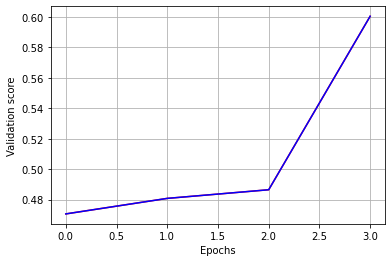

In [13]:
# Fit model
from keras.callbacks import EarlyStopping
early_stopping_monitor = EarlyStopping(patience = 3)
import matplotlib.pyplot as plt
model_training = model.fit(X_train,Y_train,validation_split = 0.3,epochs = 100,callbacks = [early_stopping_monitor],verbose = False)

# Create the plot
plt.plot(model_training.history['val_loss'], 'r', model_training.history['val_loss'], 'b')
plt.grid()
plt.xlabel('Epochs')
plt.ylabel('Validation score')
plt.show()


to save your model: save in file format HDF5 --> h5 format

In [14]:
model.save('Diabetes_model.h5')  

**Reload** your model 

In [15]:
from keras.models import load_model

In [16]:
model = load_model('Diabetes_model.h5')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               900       
                                                                 
 dense_1 (Dense)             (None, 150)               15150     
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 dense_3 (Dense)             (None, 150)               22650     
                                                                 
 dense_4 (Dense)             (None, 150)               22650     
                                                                 
 dense_5 (Dense)             (None, 200)               30200     
                                                                 
 dense_6 (Dense)             (None, 50)                1

make **prediction**

In [23]:
prediction = model.predict(predictors)   # replace predictors with test data

NameError: name 'predictors' is not defined

In [19]:
prediction

NameError: name 'prediction' is not defined

In [20]:
prediction[:,1]   # probability true -- the probability that the shot is made 

NameError: name 'prediction' is not defined